In [91]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import  LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
import seaborn as sns


In [92]:
df = pd.read_csv("adult.csv",sep=",")
df

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [93]:
df.columns = ["Age", "Employment_Type", "fnwlgt", "Education", "Experience","Martial-Status", "Occupation", "Relation", "Race", "Sex", "Capital_Gain", "Capital_Loss", "Hours_Per_Week", "Country", "Target"]
df

,Age,Employment_Type,fnwlgt,Education,Experience,Martial-Status,Occupation,Relation,Race,Sex,Capital_Gain,Capital_Loss,Hours_Per_Week,Country,Target
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [94]:
df.isnull().sum()

Age                0
Employment_Type    0
fnwlgt             0
Education          0
Experience         0
Martial-Status     0
Occupation         0
Relation           0
Race               0
Sex                0
Capital_Gain       0
Capital_Loss       0
Hours_Per_Week     0
Country            0
Target             0
dtype: int64

In [95]:
(df.values == np.nan).sum()

0

In [96]:
(df.values == ' ?').sum()

4262

In [97]:
df["Employment_Type"].unique()

array([' Self-emp-not-inc', ' Private', ' State-gov', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [98]:
df.replace(' ?', np.nan, inplace=True)

In [99]:
df = df.dropna()

In [100]:
df

,Age,Employment_Type,fnwlgt,Education,Experience,Martial-Status,Occupation,Relation,Race,Sex,Capital_Gain,Capital_Loss,Hours_Per_Week,Country,Target
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [101]:
df["Employment_Type"].unique()

array([' Self-emp-not-inc', ' Private', ' State-gov', ' Federal-gov',
       ' Local-gov', ' Self-emp-inc', ' Without-pay'], dtype=object)

In [102]:
df.loc[df["Employment_Type"]==1,"Employment_Type"]==" Self-emp-not-inc"
df.loc[df["Employment_Type"]==2, "Employment_Type"]==" Private"

Series([], Name: Employment_Type, dtype: bool)

In [103]:
df.head()

,Age,Employment_Type,fnwlgt,Education,Experience,Martial-Status,Occupation,Relation,Race,Sex,Capital_Gain,Capital_Loss,Hours_Per_Week,Country,Target
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [104]:
df["Employment_Type"] = lb.fit_transform(df["Employment_Type"])

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_1488\4190799575.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Employment_Type"] = lb.fit_transform(df["Employment_Type"])


In [105]:
df["Education"] = lb.fit_transform(df["Education"])

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_1488\69502588.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Education"] = lb.fit_transform(df["Education"])


In [106]:
df["Martial-Status"] = lb.fit_transform(df["Martial-Status"])

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_1488\67372475.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Martial-Status"] = lb.fit_transform(df["Martial-Status"])


In [107]:
df["Occupation"] = lb.fit_transform(df["Occupation"])

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_1488\3989975875.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Occupation"] = lb.fit_transform(df["Occupation"])


In [108]:
df["Relation"] = lb.fit_transform(df["Relation"])

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_1488\1174270575.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Relation"] = lb.fit_transform(df["Relation"])


In [109]:
df["Race"] = lb.fit_transform(df["Race"])

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_1488\4209164641.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Race"] = lb.fit_transform(df["Race"])


In [110]:
df["Country"] = lb.fit_transform(df["Country"])

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_1488\409990545.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Country"] = lb.fit_transform(df["Country"])


In [111]:
df["Sex"] = lb.fit_transform(df["Sex"])

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_1488\826049034.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Sex"] = lb.fit_transform(df["Sex"])


In [112]:
df["Target"] = lb.fit_transform(df["Target"])

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_1488\1268326083.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Target"] = lb.fit_transform(df["Target"])


In [113]:
df

,Age,Employment_Type,fnwlgt,Education,Experience,Martial-Status,Occupation,Relation,Race,Sex,Capital_Gain,Capital_Loss,Hours_Per_Week,Country,Target
0,50,4,83311,9,13,2,3,0,4,1,0,0,13,38,0
1,38,2,215646,11,9,0,5,1,4,1,0,0,40,38,0
2,53,2,234721,1,7,2,5,0,2,1,0,0,40,38,0
3,28,2,338409,9,13,2,9,5,2,0,0,0,40,4,0
4,37,2,284582,12,14,2,3,5,4,0,0,0,40,38,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,2,257302,7,12,2,12,5,4,0,0,0,38,38,0
32556,40,2,154374,11,9,2,6,0,4,1,0,0,40,38,1
32557,58,2,151910,11,9,6,0,4,4,0,0,0,40,38,0
32558,22,2,201490,11,9,4,0,3,4,1,0,0,20,38,0


In [114]:
df["Employment_Type"].unique()

array([4, 2, 5, 0, 1, 3, 6])

In [115]:
df["Race"].unique()

array([4, 2, 1, 0, 3])

In [116]:
df["Country"].unique()

array([38,  4, 22, 18, 25, 32, 15,  8,  1, 10, 19, 29, 30,  3,  0, 36,  6,
       24, 35, 13, 31,  5,  7,  9, 12, 21,  2, 34, 23, 40, 28, 27, 33, 37,
       11, 26, 39, 16, 20, 17, 14])

In [117]:
df["Target"].unique()

array([0, 1])

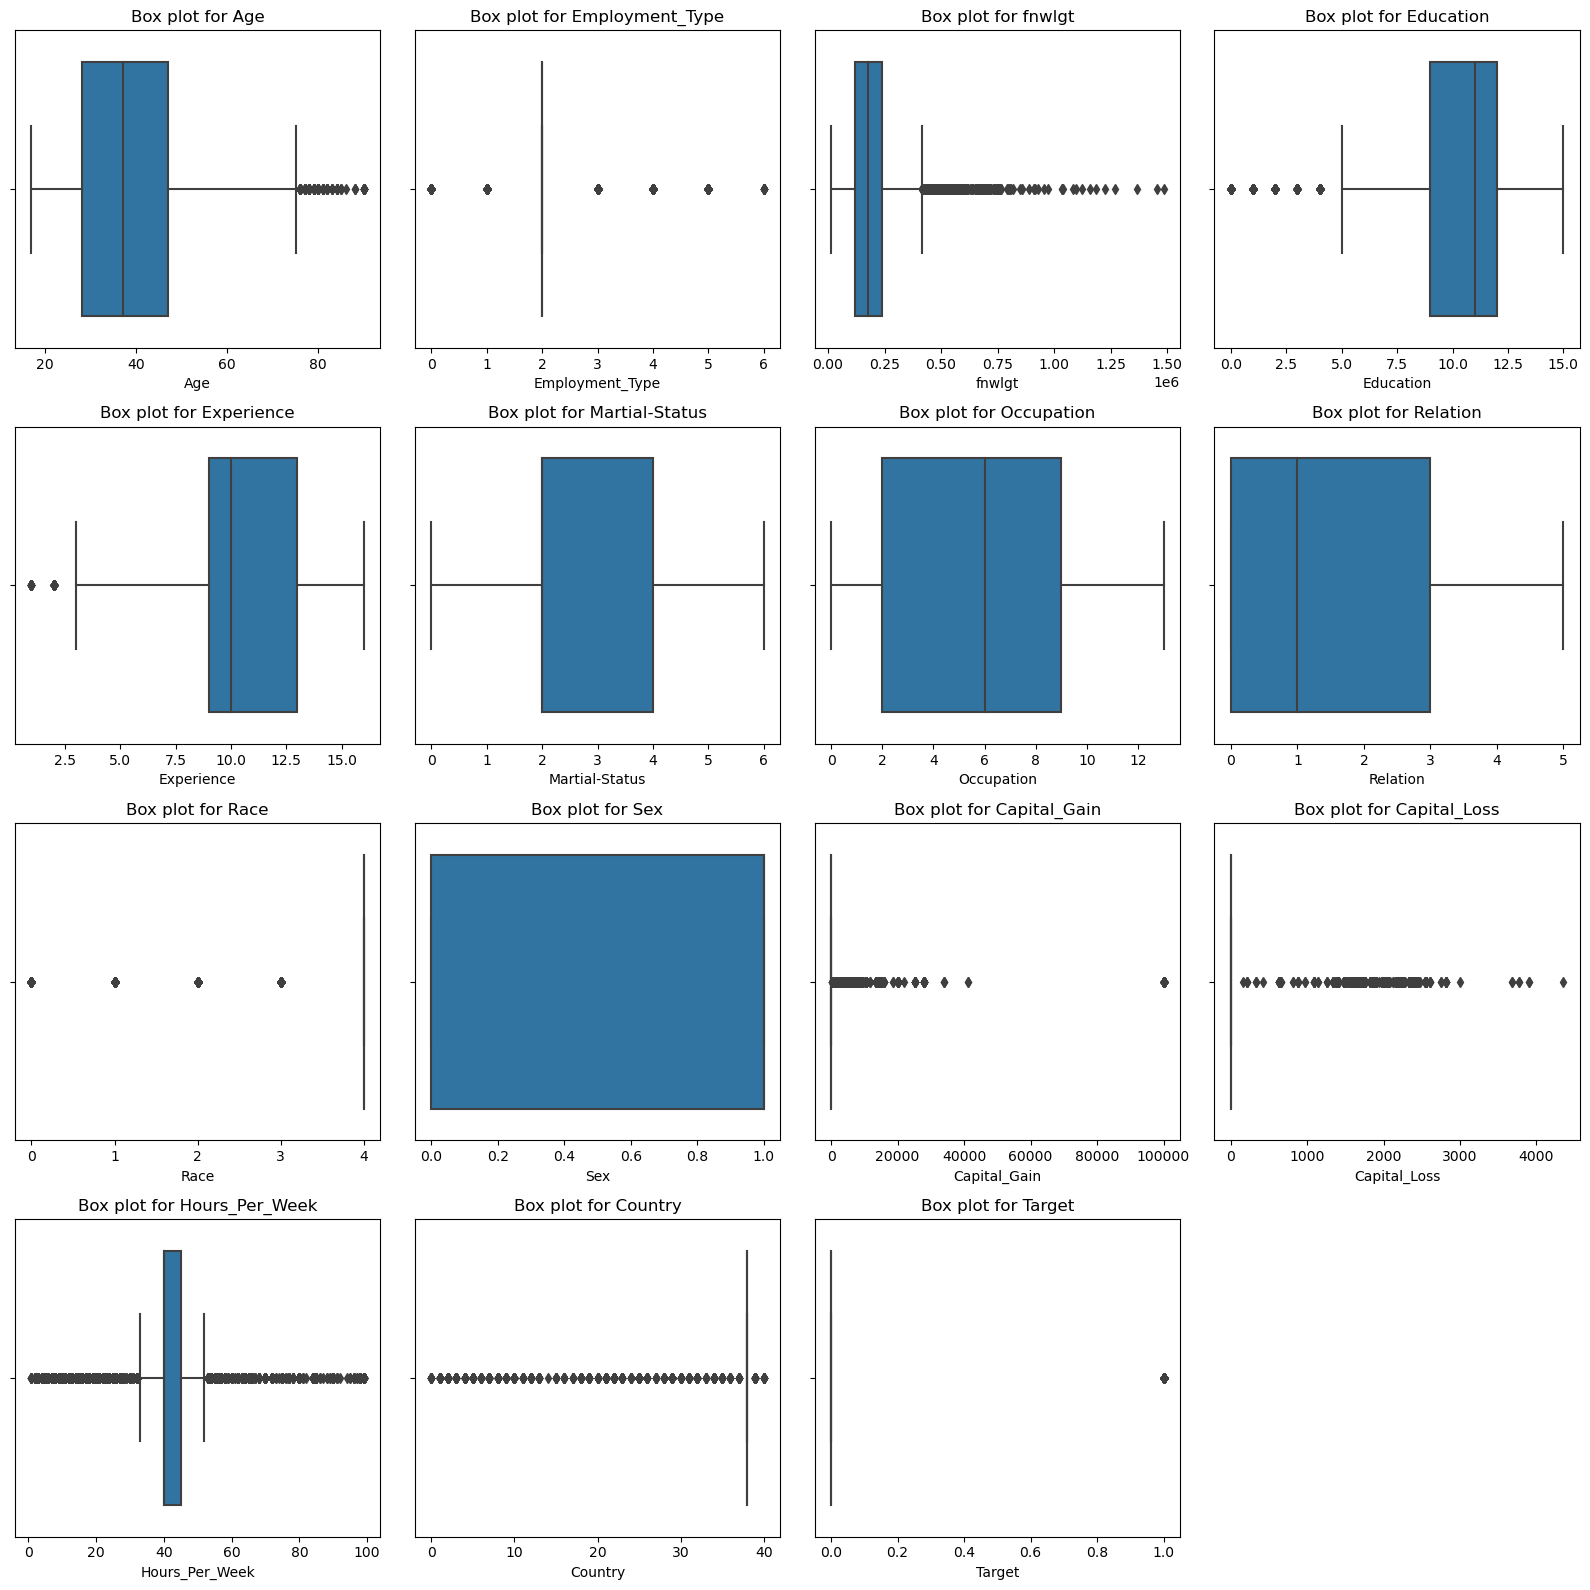

In [118]:
def box_plot(df):
    num_cols = len(df.select_dtypes(include=["int64", "float64", "int32"]).columns)
    num_rows = (num_cols + 3) // 4
    num_cols = min(num_cols, 4)
    
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, 4 * num_rows))
    
    axes = axes.flatten()
    
    for i, col in enumerate(df.select_dtypes(include=["int64", "float64", "int32"]).columns):
        sns.boxplot(x=df[col], ax=axes[i])
        axes[i].set_title(f"Box plot for {col}")
        
    for j in range(i + 1, len(axes)):
        axes[j].axis('off')
        
    plt.tight_layout()
    plt.show()

box_plot(df)


In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30161 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              30161 non-null  int64
 1   Employment_Type  30161 non-null  int32
 2   fnwlgt           30161 non-null  int64
 3   Education        30161 non-null  int32
 4   Experience       30161 non-null  int64
 5   Martial-Status   30161 non-null  int32
 6   Occupation       30161 non-null  int32
 7   Relation         30161 non-null  int32
 8   Race             30161 non-null  int32
 9   Sex              30161 non-null  int32
 10  Capital_Gain     30161 non-null  int64
 11  Capital_Loss     30161 non-null  int64
 12  Hours_Per_Week   30161 non-null  int64
 13  Country          30161 non-null  int32
 14  Target           30161 non-null  int32
dtypes: int32(9), int64(6)
memory usage: 2.6 MB


In [120]:
threshold = {
    "Age" : 50, "Employment_Type" : 7, "fnwlgt": 250000, "Education": 12, "Experience" : 13,"Martial-Status":4, "Occupation":9, "Relation":3, "Race":4, "Sex":1, "Capital_Gain":10000, "Capital_Loss":30000, "Hours_Per_Week":50, "Country":38,"Target":1
}

Removing Outlier for Age


C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


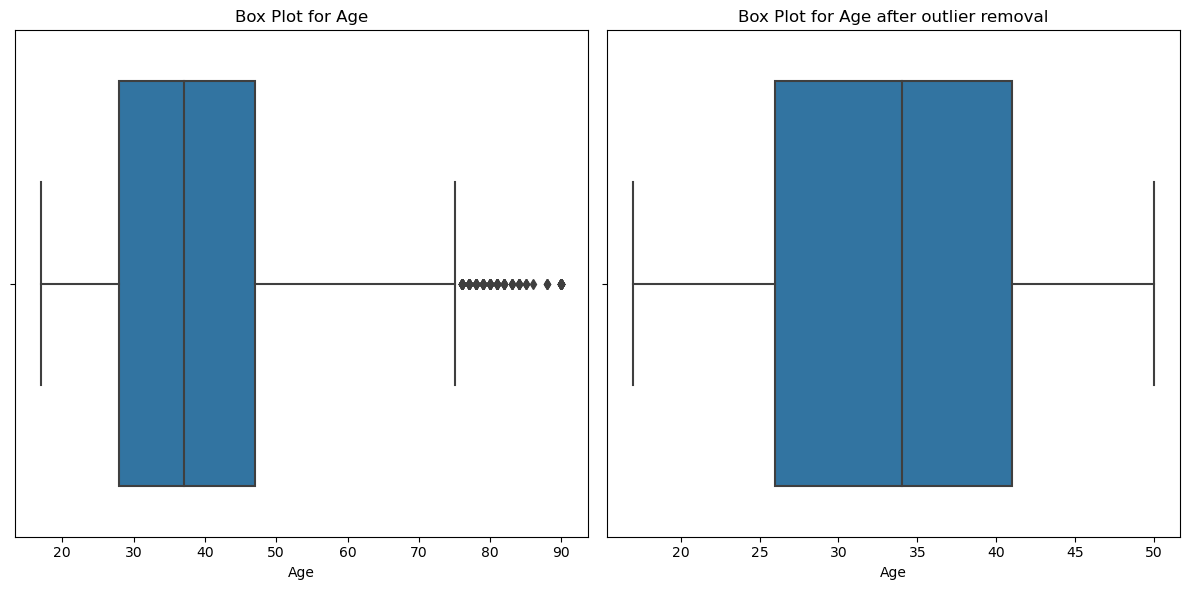

Removing Outlier for Employment_Type


C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


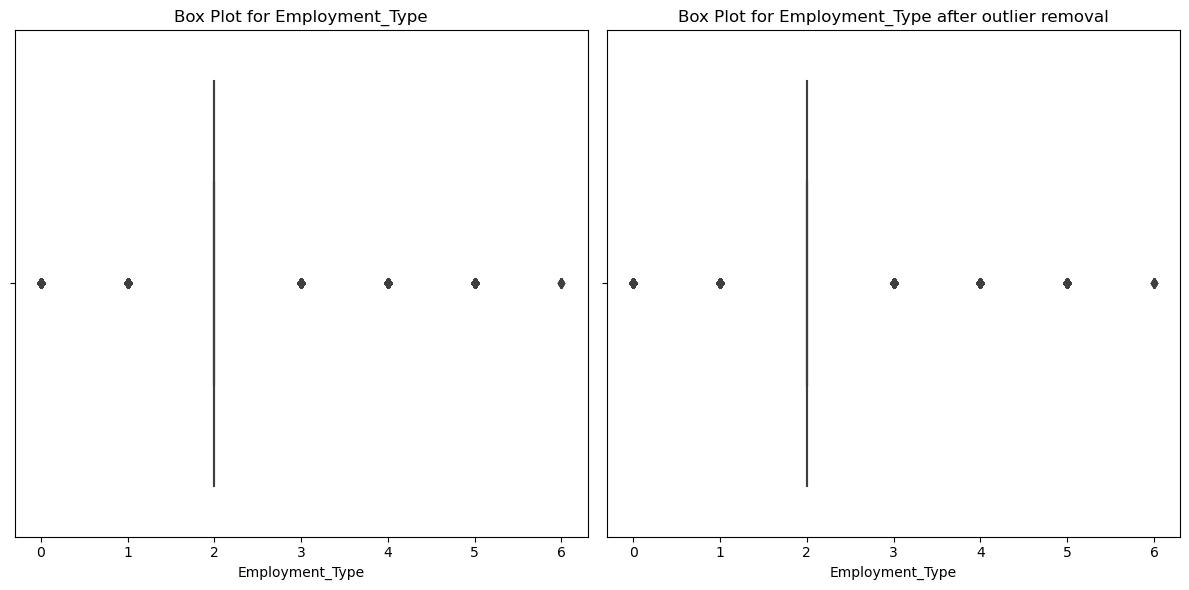

Removing Outlier for fnwlgt


C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


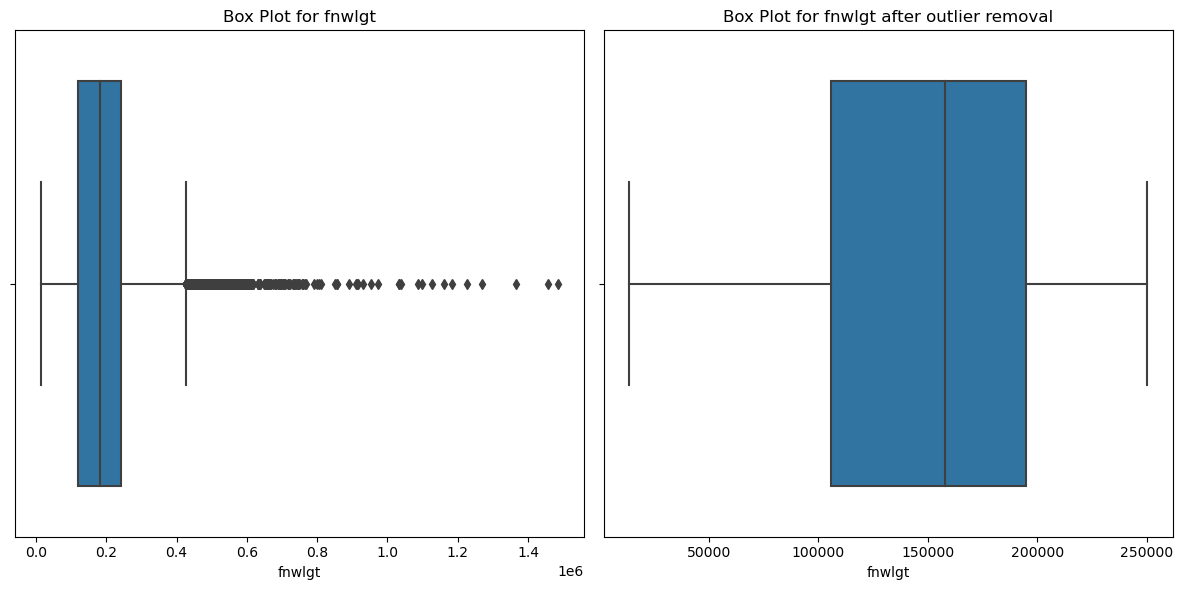

Removing Outlier for Education


C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


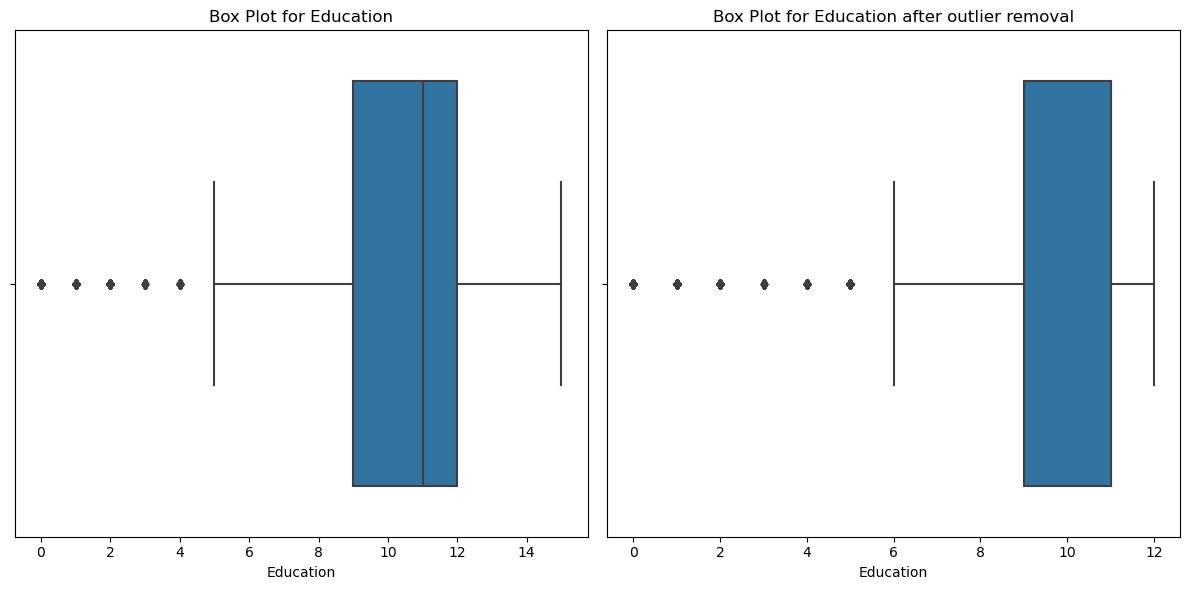

Removing Outlier for Experience


C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


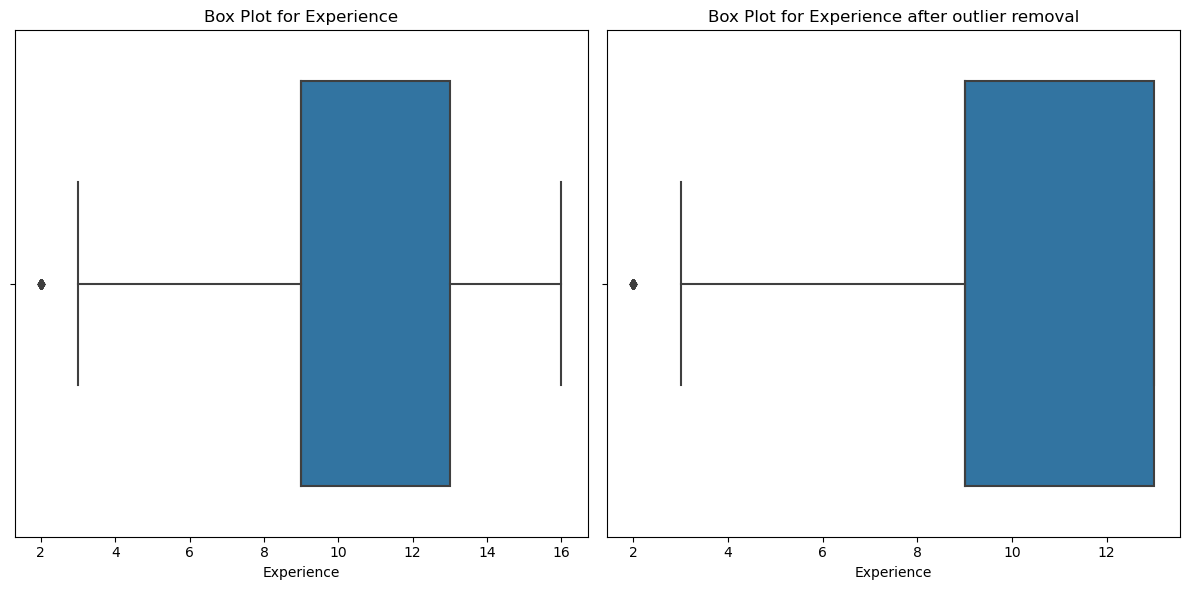

Removing Outlier for Martial-Status


C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


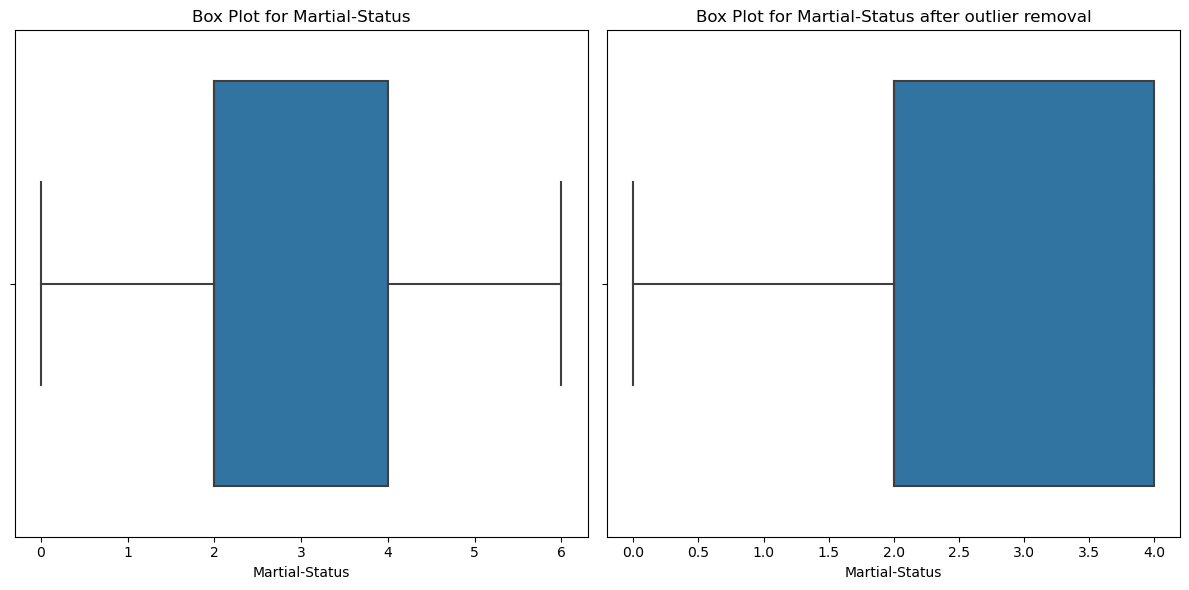

Removing Outlier for Occupation


C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


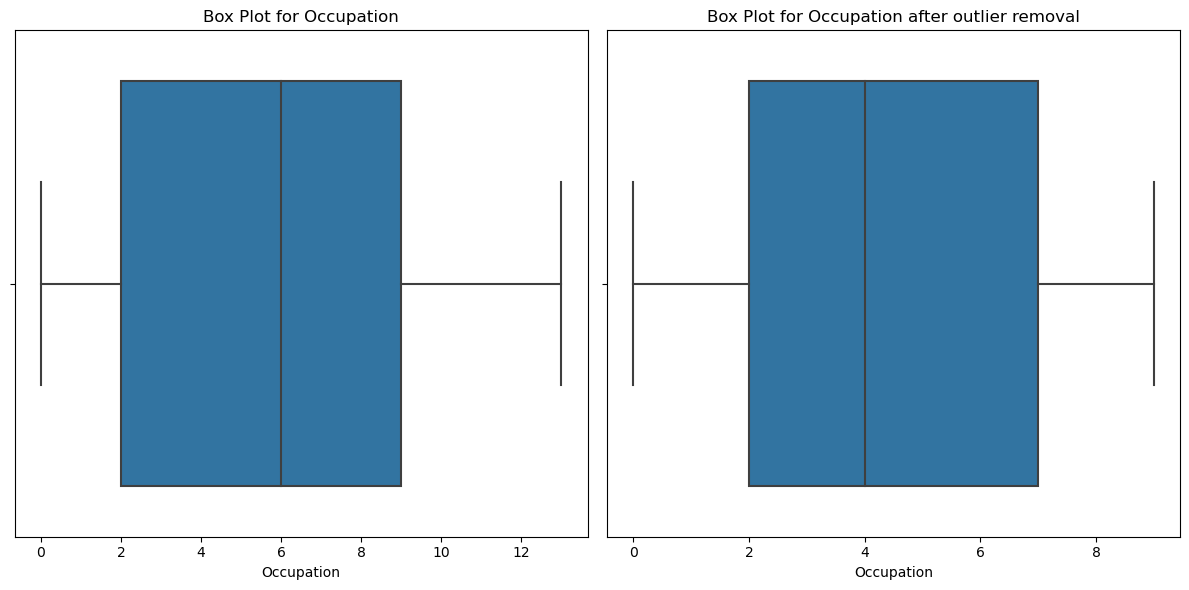

Removing Outlier for Relation


C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


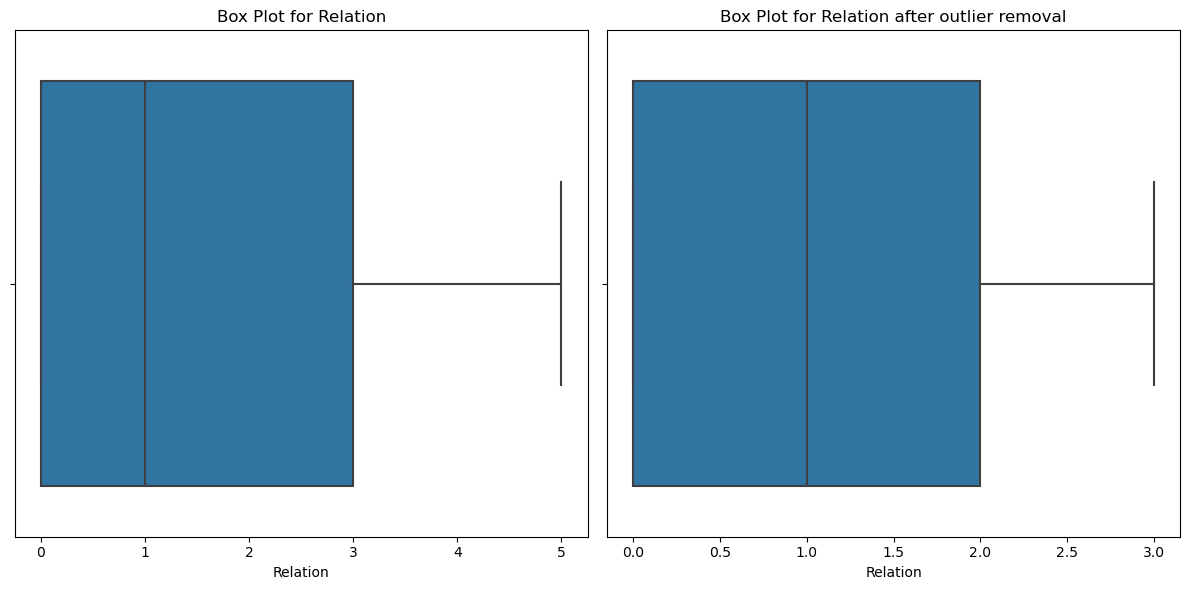

Removing Outlier for Race


C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


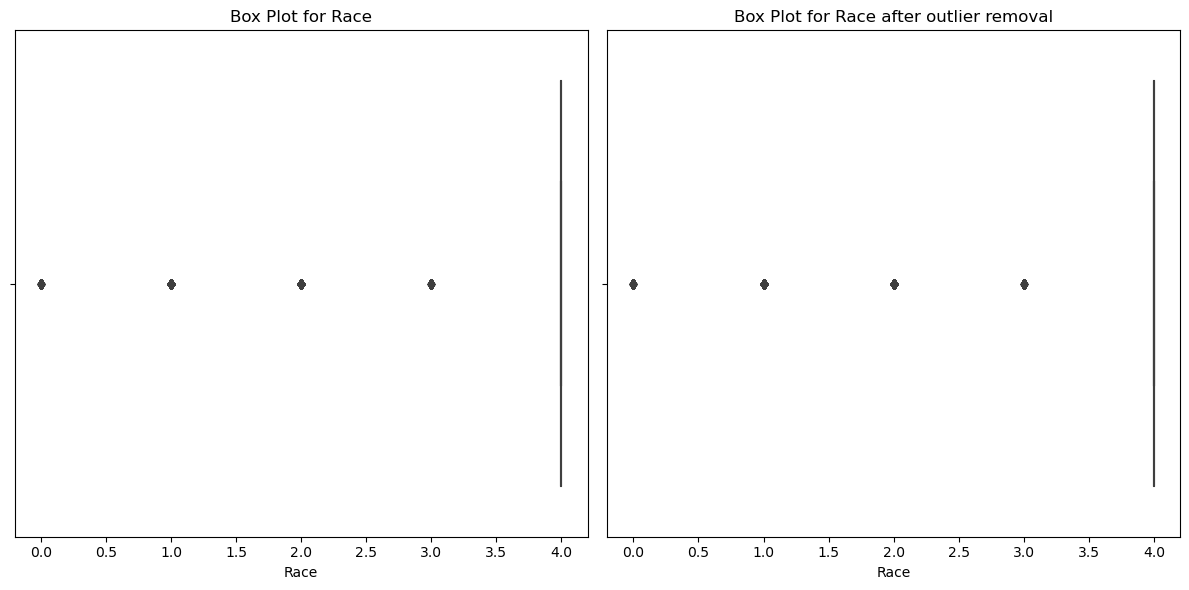

Removing Outlier for Sex


C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


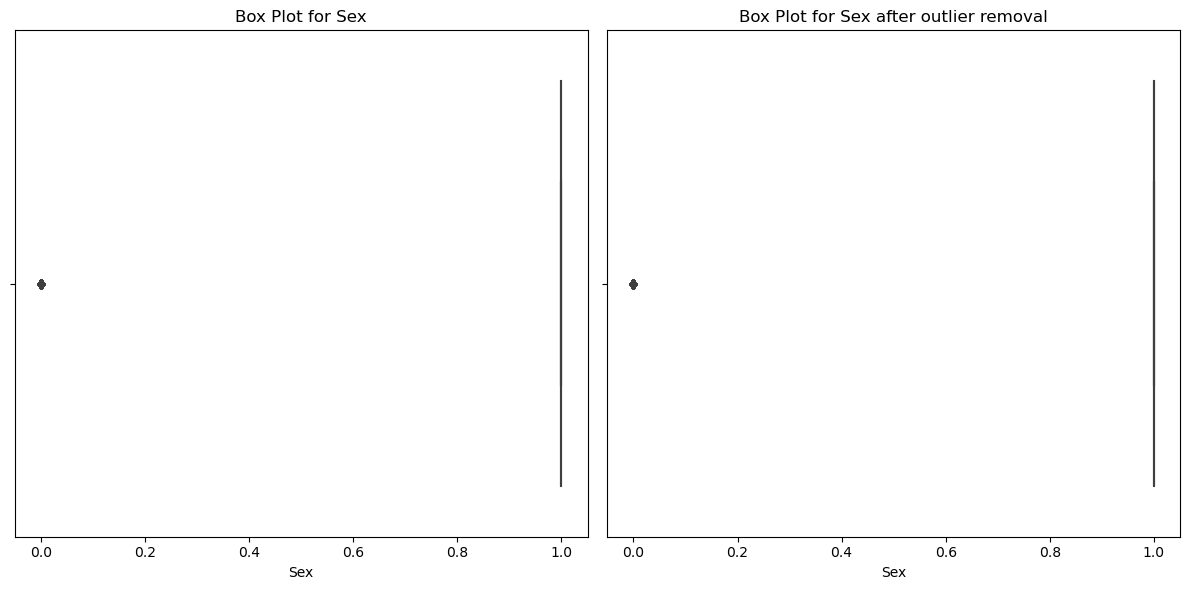

Removing Outlier for Capital_Gain


C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


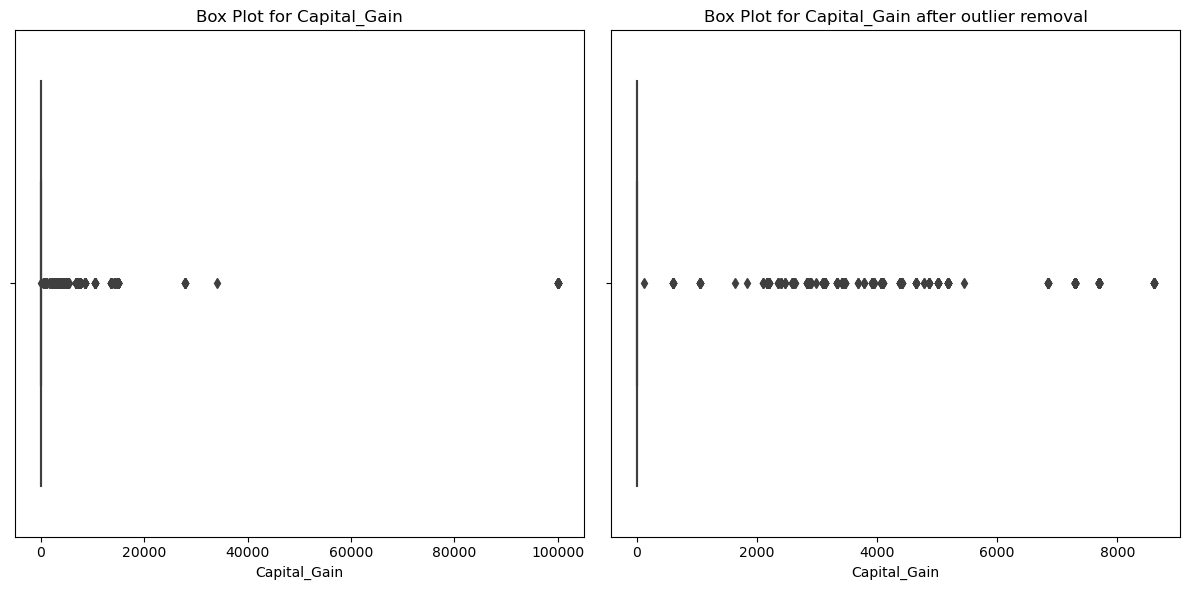

Removing Outlier for Capital_Loss


C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


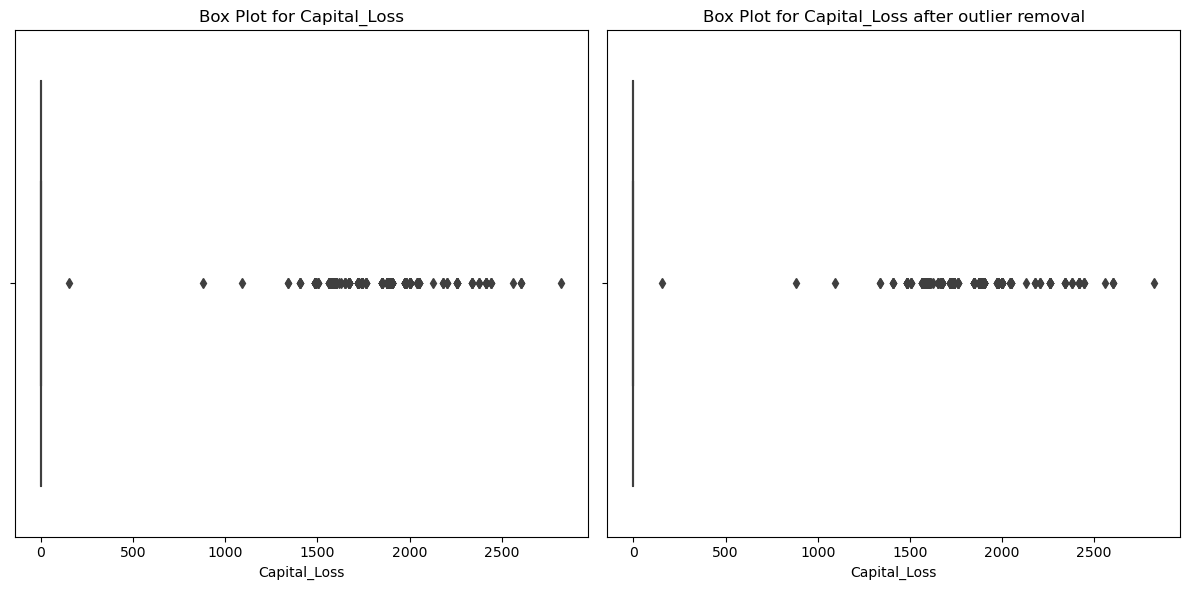

Removing Outlier for Hours_Per_Week


C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


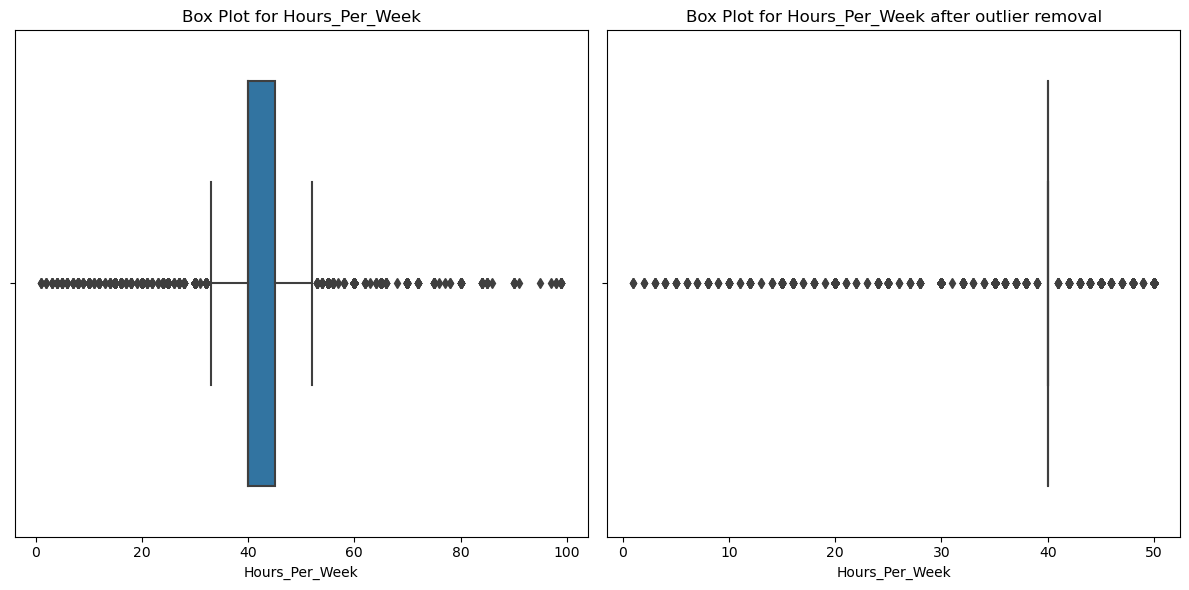

Removing Outlier for Country


C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


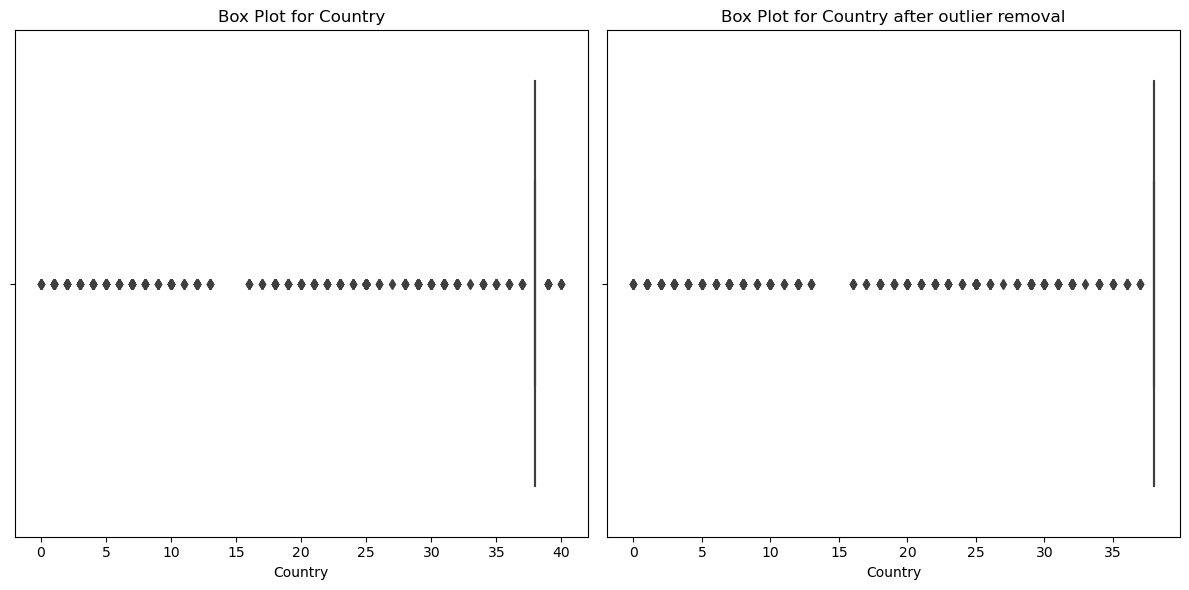

Removing Outlier for Target


C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


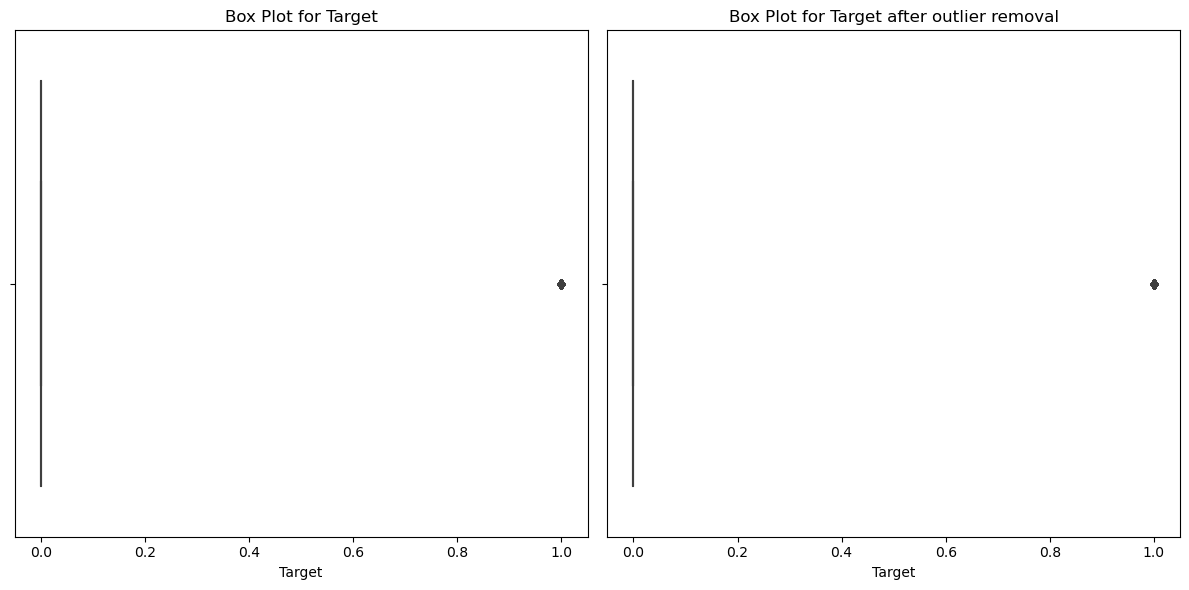

In [86]:
def remove_box(col, thres, df):
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    sns.boxplot(df[col], ax=axes[0])
    axes[0].set_title(f"Box Plot for {col}")

    remove_out = df[df[col] <= thres]
    
    sns.boxplot(remove_out[col], ax=axes[1])
    axes[1].set_title(f"Box Plot for {col} after outlier removal")

    plt.tight_layout()
    plt.show()

    return remove_out

def remove_outlier(df, threshold):
    for col, thres in threshold.items():
        print(f"Removing Outlier for {col}")
        df = remove_box(col, thres, df)
    
    return df

new_df = remove_outlier(df, threshold)


In [121]:
attributes = df[["Age", "Employment_Type", "fnwlgt", "Education", "Experience","Martial-Status", "Occupation", "Relation", "Race", "Sex", "Capital_Gain", "Capital_Loss", "Hours_Per_Week", "Country"]]

In [122]:
from sklearn.model_selection import train_test_split


In [126]:
x_train,x_test,y_train,y_test = train_test_split(attributes,df["Target"],test_size=0.25,random_state=0)

In [127]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [128]:
lr = LogisticRegression()
lr.fit(x_train,y_train)
lr_pred = lr.predict(x_test)
lr_acc = accuracy_score(lr_pred,y_test)
lr_acc

C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7838482959819653

In [129]:
from sklearn.naive_bayes import GaussianNB

In [131]:
gb = GaussianNB()
gb.fit(x_train,y_train)
gb_pred = gb.predict(x_test)
gb_acc = accuracy_score(y_test,gb_pred)
gb_acc

0.7866330725367988